In [74]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plot

Levantamos los datos

In [75]:
path = "../testing_results/test_movimiento_0.010000.txt"
df_entero = pd.read_csv(path, sep=';')
print(df_entero)

          base  shoulder     elbow     pitch      roll  is_end_pose
0     0.000102  1.483355  0.000033 -0.002246 -0.000490            0
1     0.000102  1.483355  0.000033 -0.002246 -0.000490            0
2    -0.047499  1.435757  0.031765 -0.033981  0.047107            0
3    -0.037795  1.435844  0.031784 -0.035173  0.044935            0
4    -0.095100  1.388158  0.063496 -0.065716  0.094705            0
...        ...       ...       ...       ...       ...          ...
2615  0.099285  1.438423 -0.089661  0.085083 -0.090033            0
2616  0.044721  1.461006 -0.044822  0.042576 -0.045383            0
2617  0.053705  1.460966 -0.044781  0.040816 -0.048366            0
2618  0.000051  1.483449  0.000059 -0.002306 -0.000552            1
2619  0.009867  1.483416  0.000033 -0.003178 -0.000490            1

[2620 rows x 6 columns]


Agregamos cual a que movimiento corresponde cada posición

In [76]:
arr_de_ceros = [0]*len(df_entero)
arr_de_ceros_2 = [0]*len(df_entero)
arr_de_ceros_3 = [0]*len(df_entero)
df_entero_discriminando_movimientos = df_entero.assign(movimiento=arr_de_ceros)
df_entero_discriminando_movimientos = df_entero_discriminando_movimientos.assign(num_goal=arr_de_ceros_2)
df_entero_discriminando_movimientos = df_entero_discriminando_movimientos.assign(es_el_esperado=arr_de_ceros_2)


num_movimiento = 1
num_de_goal = 1
primer_final_encontrado = False
es_real = False

for i, row in df_entero_discriminando_movimientos.iterrows():
    df_entero_discriminando_movimientos.at[i, 'movimiento'] = num_movimiento
    df_entero_discriminando_movimientos.at[i, 'num_goal'] = num_de_goal

    if(not es_real) :
        df_entero_discriminando_movimientos.at[i, 'es_el_esperado'] = 1
        es_real = True
    else :
        es_real = False
        num_de_goal = num_de_goal + 1
        if (row['is_end_pose'] == 1) :
            num_movimiento = (num_movimiento%3) + 1
            num_de_goal = 1



print(df_entero_discriminando_movimientos)

          base  shoulder     elbow     pitch      roll  is_end_pose  \
0     0.000102  1.483355  0.000033 -0.002246 -0.000490            0   
1     0.000102  1.483355  0.000033 -0.002246 -0.000490            0   
2    -0.047499  1.435757  0.031765 -0.033981  0.047107            0   
3    -0.037795  1.435844  0.031784 -0.035173  0.044935            0   
4    -0.095100  1.388158  0.063496 -0.065716  0.094705            0   
...        ...       ...       ...       ...       ...          ...   
2615  0.099285  1.438423 -0.089661  0.085083 -0.090033            0   
2616  0.044721  1.461006 -0.044822  0.042576 -0.045383            0   
2617  0.053705  1.460966 -0.044781  0.040816 -0.048366            0   
2618  0.000051  1.483449  0.000059 -0.002306 -0.000552            1   
2619  0.009867  1.483416  0.000033 -0.003178 -0.000490            1   

      movimiento  num_goal  es_el_esperado  
0              1         1               1  
1              1         1               0  
2           

In [77]:
df_primer_mov = df_entero_discriminando_movimientos.query('movimiento == 1')
df_segundo_mov = df_entero_discriminando_movimientos.query('movimiento == 2')
df_tercer_mov = df_entero_discriminando_movimientos.query('movimiento == 3')

df_primer_mov_real = df_primer_mov.query('es_el_esperado == 0')
df_primer_mov_esperado = df_primer_mov.query('es_el_esperado == 1')

df_segundo_mov_real = df_segundo_mov.query('es_el_esperado == 0')
df_segundo_mov_esperado = df_segundo_mov.query('es_el_esperado == 1')

df_tercer_mov_real = df_tercer_mov.query('es_el_esperado == 0')
df_tercer_mov_esperado = df_tercer_mov.query('es_el_esperado == 1')

In [78]:
print(df_primer_mov_real.get('num_goal').value_counts())
print(df_segundo_mov_real.get('num_goal').value_counts())
print(df_tercer_mov_real.get('num_goal').value_counts())

1     10
26    10
20    10
21    10
22    10
23    10
24    10
25    10
27    10
2     10
28    10
29    10
30    10
31    10
32    10
33    10
19    10
18    10
17    10
16    10
15    10
14    10
13    10
12    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
34    10
Name: num_goal, dtype: int64
1     10
32    10
34    10
35    10
36    10
      ..
26    10
27    10
28    10
29    10
61    10
Name: num_goal, Length: 61, dtype: int64
1     10
2     10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
20    10
19    10
18    10
9     10
3     10
4     10
5     10
6     10
7     10
8     10
10    10
17    10
11    10
12    10
13    10
14    10
15    10
16    10
36    10
Name: num_goal, dtype: int64


In [79]:
df_primer_mov_real = df_primer_mov_real.query('is_end_pose == 1')
print(df_primer_mov_real)
df_segundo_mov_real = df_segundo_mov_real.query('is_end_pose == 1')
df_tercer_mov_real = df_tercer_mov_real.query('is_end_pose == 1')

          base  shoulder     elbow     pitch      roll  is_end_pose  \
67   -1.561348 -0.087318  1.047138 -1.052110  1.568630            1   
329  -1.561314 -0.087349  1.047138 -1.051946  1.568630            1   
591  -1.560836 -0.087318  1.047204 -1.051891  1.569121            1   
853  -1.561655 -0.087349  1.047171 -1.051836  1.568630            1   
1115 -1.560904 -0.087379  1.047138 -1.051891  1.568630            1   
1377 -1.560904 -0.087287  1.047270 -1.051946  1.569121            1   
1639 -1.562474 -0.087410  1.047138 -1.051782  1.569121            1   
1901 -1.561416 -0.087287  1.047105 -1.051946  1.568794            1   
2163 -1.560972 -0.087226  1.047302 -1.051836  1.568957            1   
2425 -1.561075 -0.087349  1.047105 -1.051672  1.568957            1   

      movimiento  num_goal  es_el_esperado  
67             1        34               0  
329            1        34               0  
591            1        34               0  
853            1        34            

In [80]:
df_primer_mov_esperado = df_primer_mov_esperado.query('is_end_pose == 1')
print(df_primer_mov_esperado)
df_segundo_mov_esperado = df_segundo_mov_esperado.query('is_end_pose == 1')
df_tercer_mov_esperado = df_tercer_mov_esperado.query('is_end_pose == 1')

          base  shoulder     elbow     pitch      roll  is_end_pose  \
66   -1.570737 -0.087390  1.047176 -1.049493  1.570233            1   
328  -1.570617 -0.087428  1.047160 -1.049378  1.570229            1   
590  -1.570645 -0.087488  1.047221 -1.049415  1.570312            1   
852  -1.570760 -0.087415  1.047205 -1.049408  1.570228            1   
1114 -1.570700 -0.087539  1.047141 -1.049418  1.570240            1   
1376 -1.570690 -0.087469  1.047260 -1.049421  1.570286            1   
1638 -1.570599 -0.087514  1.047140 -1.049349  1.570286            1   
1900 -1.570709 -0.087376  1.047140 -1.049361  1.570358            1   
2162 -1.570659 -0.087375  1.047326 -1.049351  1.570213            1   
2424 -1.570607 -0.087475  1.047148 -1.049400  1.570216            1   

      movimiento  num_goal  es_el_esperado  
66             1        34               1  
328            1        34               1  
590            1        34               1  
852            1        34            

In [81]:
df_primer_mov_real_juntas = df_primer_mov_real.drop(['is_end_pose','movimiento','num_goal','es_el_esperado'],axis='columns')
print(df_primer_mov_real_juntas)
df_segundo_mov_real_juntas = df_segundo_mov_real.drop(['is_end_pose','movimiento','num_goal','es_el_esperado'],axis='columns')
df_tercer_mov_real_juntas = df_tercer_mov_real.drop(['is_end_pose','movimiento','num_goal','es_el_esperado'],axis='columns')

df_primer_mov_esperado_juntas = df_primer_mov_esperado.drop(['is_end_pose','movimiento','num_goal','es_el_esperado'],axis='columns')
print(df_primer_mov_esperado_juntas)
df_segundo_mov_esperado_juntas = df_segundo_mov_esperado.drop(['is_end_pose','movimiento','num_goal','es_el_esperado'],axis='columns')
df_tercer_mov_esperado_juntas = df_tercer_mov_esperado.drop(['is_end_pose','movimiento','num_goal','es_el_esperado'],axis='columns')


          base  shoulder     elbow     pitch      roll
67   -1.561348 -0.087318  1.047138 -1.052110  1.568630
329  -1.561314 -0.087349  1.047138 -1.051946  1.568630
591  -1.560836 -0.087318  1.047204 -1.051891  1.569121
853  -1.561655 -0.087349  1.047171 -1.051836  1.568630
1115 -1.560904 -0.087379  1.047138 -1.051891  1.568630
1377 -1.560904 -0.087287  1.047270 -1.051946  1.569121
1639 -1.562474 -0.087410  1.047138 -1.051782  1.569121
1901 -1.561416 -0.087287  1.047105 -1.051946  1.568794
2163 -1.560972 -0.087226  1.047302 -1.051836  1.568957
2425 -1.561075 -0.087349  1.047105 -1.051672  1.568957
          base  shoulder     elbow     pitch      roll
66   -1.570737 -0.087390  1.047176 -1.049493  1.570233
328  -1.570617 -0.087428  1.047160 -1.049378  1.570229
590  -1.570645 -0.087488  1.047221 -1.049415  1.570312
852  -1.570760 -0.087415  1.047205 -1.049408  1.570228
1114 -1.570700 -0.087539  1.047141 -1.049418  1.570240
1376 -1.570690 -0.087469  1.047260 -1.049421  1.570286
1638 -1.57

In [82]:
df_error_primer_mov = df_primer_mov_esperado_juntas.reset_index(drop=True) - df_primer_mov_real_juntas.reset_index(drop=True)
print(df_error_primer_mov)
df_error_segundo_mov = df_segundo_mov_esperado_juntas.reset_index(drop=True) - df_segundo_mov_real_juntas.reset_index(drop=True)
df_error_tercer_mov = df_primer_mov_esperado_juntas.reset_index(drop=True) - df_primer_mov_real_juntas.reset_index(drop=True)

       base  shoulder     elbow     pitch      roll
0 -0.009389 -0.000072  0.000038  0.002617  0.001603
1 -0.009303 -0.000079  0.000022  0.002568  0.001599
2 -0.009809 -0.000170  0.000017  0.002476  0.001191
3 -0.009105 -0.000066  0.000034  0.002428  0.001598
4 -0.009796 -0.000160  0.000003  0.002473  0.001610
5 -0.009786 -0.000182 -0.000010  0.002525  0.001165
6 -0.008125 -0.000104  0.000002  0.002433  0.001165
7 -0.009293 -0.000089  0.000035  0.002585  0.001564
8 -0.009687 -0.000149  0.000024  0.002485  0.001256
9 -0.009532 -0.000126  0.000043  0.002272  0.001259


In [83]:
df_error_primer_mov_avg = df_error_primer_mov.abs().mean()
df_error_primer_mov_var = df_error_primer_mov.abs().var()

df_error_segundo_mov_avg = df_error_segundo_mov.abs().mean()
df_error_segundo_mov_var = df_error_segundo_mov.abs().var()

df_error_tercer_mov_avg = df_error_tercer_mov.abs().mean()
df_error_tercer_mov_var = df_error_tercer_mov.abs().var()


                 1         2         3
base      0.009383  0.006423  0.009383
shoulder  0.000120  0.000183  0.000120
elbow     0.000023  0.000052  0.000023
pitch     0.002486  0.000809  0.002486
roll      0.001401  0.001570  0.001401


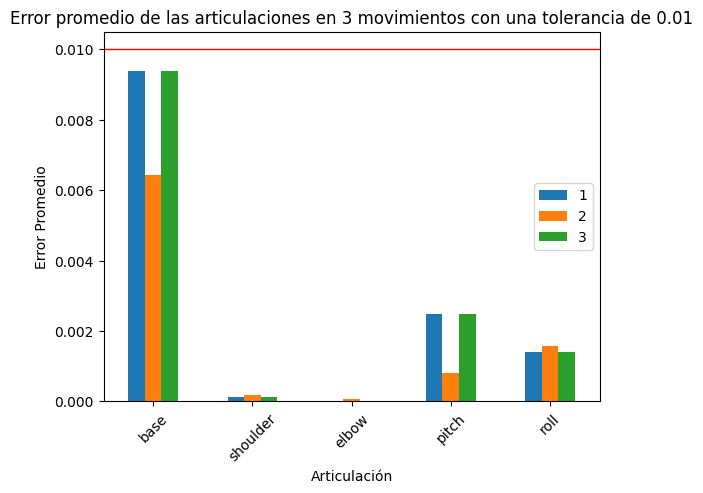

In [85]:
df_errores_avg = pd.concat([df_error_primer_mov_avg.rename('1'), df_error_segundo_mov_avg.rename('2'), df_error_tercer_mov_avg.rename('3')], axis=1)
print(df_errores_avg)

df_errores_avg.plot(kind='bar')
plot.title("Error promedio de las articulaciones en 3 movimientos con una tolerancia de 0.01")
plot.ylabel("Error Promedio")
plot.xlabel("Articulación")
plot.xticks(rotation=45, horizontalalignment="center")
plot.axhline(y=0.01, linewidth=1, color='red')
